In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


# Same epsilon for the 2 players : Q-learning

## 1- Importation and cleaning

In [2]:
df = pd.read_csv('../final_data/epilon_qlearning.csv')
# Function to convert string to list of two numbers using regular expressions
def extract_numbers(text):
    numbers = re.findall(r'-?\d+\.?\d*(?:e[-+]?\d+)?', text)
    return [float(num) for num in numbers]

# Apply the function to the column and convert the strings into lists of two numbers
df['Rewards'] = df['Rewards'].apply(extract_numbers)
df['Prices'] = df['Prices'].apply(extract_numbers)
df['Epsilon'] = df['Epsilon'].apply(extract_numbers)

#Convert into int if digit
df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)


#Separate the profits, prices and Epsilon of each player
df[['Reward1', 'Reward2']] = df['Rewards'].apply(lambda x: pd.Series(x))
df[['Price1', 'Price2']] = df['Prices'].apply(lambda x: pd.Series(x))
df[['Epsilon1', 'Epsilon2']] = df['Epsilon'].apply(lambda x: pd.Series(x))

#Drop the useless columns
df = df.drop(columns=['Rewards', 'Prices', 'Epsilon', 'Unnamed: 0'])

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_832/3928503506.py:17: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Reward1', 'Reward2']] = df['Rewards'].apply(lambda x: pd.Series(x))
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_832/3928503506.py:18: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Price1', 'Price2']] = df['Prices'].apply(lambda x: pd.Series(x))
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_832/3928503506.py:19: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Epsilon1', 'Epsilon2']] = df['Epsilon'].apply(lambda x: pd.Series(x))


### Separate the dataframe into 2: final for studying the final results and iterations for learning curves

In [3]:
lc_df = df[~(df['Iteration']=='last 100 iterations mean')]

In [4]:
fin_df = df[df['Iteration']=='last 100 iterations mean']

## 2- Learning curves

In [5]:
df['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [6]:
df_beta = lc_df[lc_df['beta']==1.0e-05]
df_beta

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
170340,0,0.00001,1,0.200836,0.280438,1.619488,1.463501,1.000000e+00,1.000000e+00
170341,10000,0.00001,1,0.265055,0.362432,1.814473,1.697482,9.048465e-01,9.048465e-01
170342,20000,0.00001,1,0.230898,0.303181,1.658485,1.541494,8.187389e-01,8.187389e-01
170343,30000,0.00001,1,0.398683,0.192741,1.619488,1.892467,7.408256e-01,7.408256e-01
170344,40000,0.00001,1,0.387404,0.277472,1.814473,1.931464,6.703267e-01,6.703267e-01
...,...,...,...,...,...,...,...,...,...
180354,9960000,0.00001,10,0.291997,0.291997,1.658485,1.658485,5.549757e-44,5.549757e-44
180355,9970000,0.00001,10,0.291997,0.291997,1.658485,1.658485,5.021628e-44,5.021628e-44
180356,9980000,0.00001,10,0.291997,0.291997,1.658485,1.658485,4.543756e-44,4.543756e-44
180357,9990000,0.00001,10,0.291997,0.291997,1.658485,1.658485,4.111361e-44,4.111361e-44


In [7]:
mean_df = df_beta.groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
mean_df

,Iteration,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2,beta
0,0,0.217752,0.306406,1.732580,1.584391,1.000000e+00,1.000000e+00,0.00001
1,10000,0.243725,0.313164,1.720881,1.623388,9.048465e-01,9.048465e-01,0.00001
2,20000,0.272785,0.306660,1.755978,1.689683,8.187389e-01,8.187389e-01,0.00001
3,30000,0.274881,0.291110,1.716981,1.685783,7.408256e-01,7.408256e-01,0.00001
4,40000,0.266844,0.318191,1.787176,1.689683,6.703267e-01,6.703267e-01,0.00001
...,...,...,...,...,...,...,...,...
996,9960000,0.290692,0.284358,1.666285,1.674084,5.549757e-44,5.549757e-44,0.00001
997,9970000,0.270682,0.317112,1.736479,1.670185,5.021628e-44,5.021628e-44,0.00001
998,9980000,0.295123,0.290733,1.681884,1.685783,4.543756e-44,4.543756e-44,0.00001
999,9990000,0.290692,0.284358,1.666285,1.674084,4.111361e-44,4.111361e-44,0.00001


In [8]:
def plot_learning_curve(mean_df):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<10**(6)], mean_df['Reward1'][mean_df['Iteration']<10**(6)],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<10**(6)], mean_df['Reward2'][mean_df['Iteration']<10**(6)],alpha=0.5, label='Player 2')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

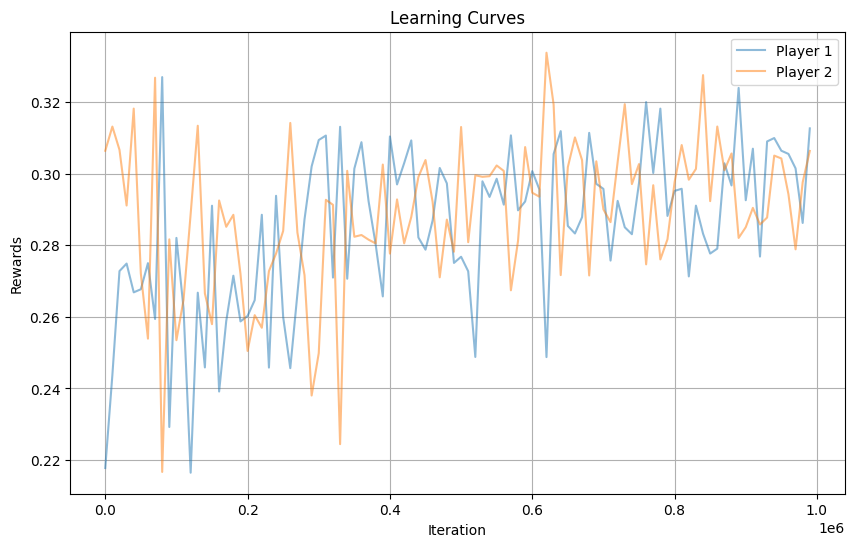

In [9]:
plot_learning_curve(mean_df)

In [11]:
def plot_learning_curve(mean_df, nb_iter):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward1'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward2'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 2')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

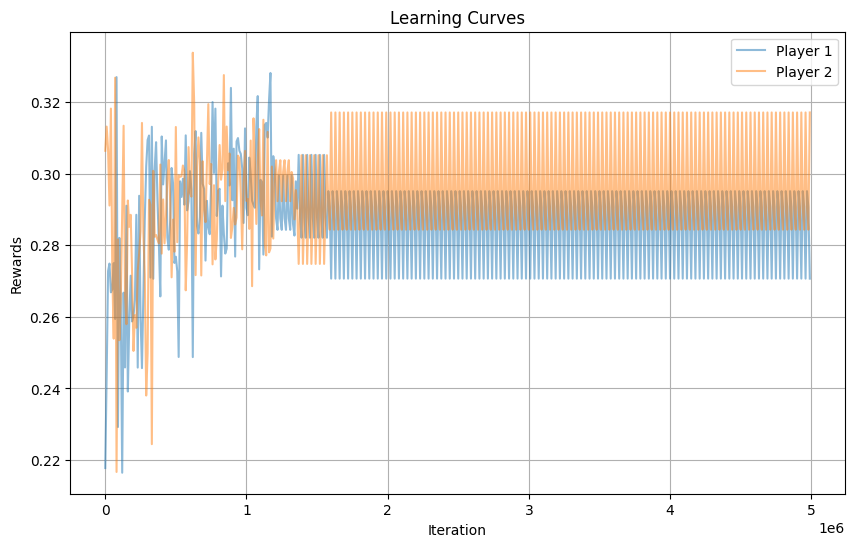

In [12]:
plot_learning_curve(mean_df, 5*(10**(6)))

## 3- Final rewards and prices as a function of beta

In [19]:
fin_df

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
1001,last 100 iterations mean,0.002500,1,0.240029,0.252429,1.658485,1.611689,0.000000e+00,0.000000e+00
2003,last 100 iterations mean,0.002500,2,0.328143,0.266708,1.711521,1.797315,0.000000e+00,0.000000e+00
3005,last 100 iterations mean,0.002500,3,0.245416,0.332796,1.822273,1.670964,0.000000e+00,0.000000e+00
4007,last 100 iterations mean,0.002500,4,0.257963,0.295301,1.734140,1.681104,0.000000e+00,0.000000e+00
5009,last 100 iterations mean,0.002500,5,0.289891,0.250191,1.580491,1.638987,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
186371,last 100 iterations mean,0.000025,6,0.276473,0.276640,1.663555,1.664725,2.672563e-109,2.672563e-109
187373,last 100 iterations mean,0.000025,7,0.274269,0.287034,1.688123,1.674084,2.672563e-109,2.672563e-109
188375,last 100 iterations mean,0.000025,8,0.257218,0.314204,1.759878,1.689683,2.672563e-109,2.672563e-109
189377,last 100 iterations mean,0.000025,9,0.304346,0.271274,1.681884,1.723610,2.672563e-109,2.672563e-109


In [29]:
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    print(df_beta_sorted['beta'].unique())
      # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()

[1.0e-07 2.5e-07 5.0e-07 7.5e-07 2.5e-06 5.0e-06 7.5e-06 1.0e-05 2.5e-05
 5.0e-05 7.5e-05 1.0e-04 2.5e-04 5.0e-04 7.5e-04 1.0e-03 2.5e-03 5.0e-03
 7.5e-03]


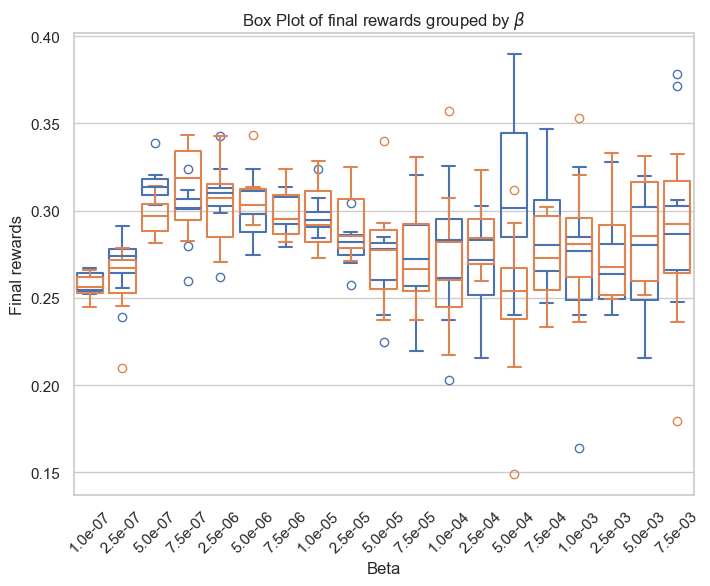

In [30]:
repart_rewards(fin_df)